In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets

In [ ]:


class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        self.fc1 = nn.Linear(128 * 8 * 8, 512)  
        self.fc2 = nn.Linear(512, 15) 

        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.5)

        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)

        x = self.relu(self.conv2(x))
        x = self.maxpool(x)

        x = self.relu(self.conv3(x))
        x = self.maxpool(x)

        x = x.view(x.size(0), -1)

        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

In [ ]:

transform = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  
])


In [ ]:


dataset_path = r'D:\Heart Disease\dataset'

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
model = CNNModel().cuda()  
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:


num_epochs = 50
train_losses = []
test_accuracies = []

In [10]:


for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval() 
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.cuda(), labels.cuda()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    test_accuracies.append(accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Test Accuracy: {accuracy:.4f}')




Epoch [1/50], Loss: 2.6359, Test Accuracy: 0.1799
Epoch [2/50], Loss: 2.4723, Test Accuracy: 0.2185
Epoch [3/50], Loss: 2.3153, Test Accuracy: 0.2159
Epoch [4/50], Loss: 2.1347, Test Accuracy: 0.3188
Epoch [5/50], Loss: 1.9606, Test Accuracy: 0.3625
Epoch [6/50], Loss: 1.7363, Test Accuracy: 0.4165
Epoch [7/50], Loss: 1.5140, Test Accuracy: 0.4730
Epoch [8/50], Loss: 1.2703, Test Accuracy: 0.5321
Epoch [9/50], Loss: 1.1595, Test Accuracy: 0.5656
Epoch [10/50], Loss: 0.8853, Test Accuracy: 0.6041
Epoch [11/50], Loss: 0.7664, Test Accuracy: 0.6350
Epoch [12/50], Loss: 0.6622, Test Accuracy: 0.6298
Epoch [13/50], Loss: 0.5938, Test Accuracy: 0.6761
Epoch [14/50], Loss: 0.5275, Test Accuracy: 0.6761
Epoch [15/50], Loss: 0.4656, Test Accuracy: 0.7018
Epoch [16/50], Loss: 0.3863, Test Accuracy: 0.6889
Epoch [17/50], Loss: 0.3650, Test Accuracy: 0.6427
Epoch [18/50], Loss: 0.3691, Test Accuracy: 0.6581
Epoch [19/50], Loss: 0.3411, Test Accuracy: 0.6915
Epoch [20/50], Loss: 0.2702, Test Accura

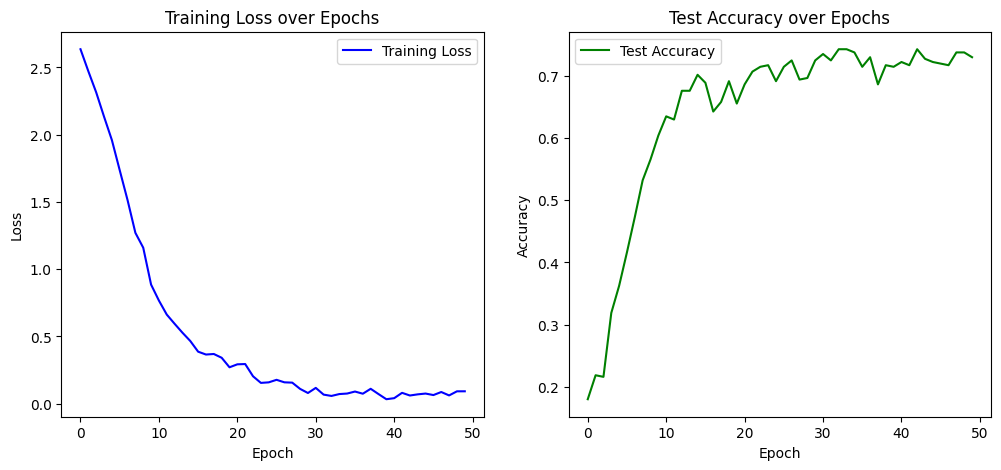

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.legend()

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.4308496].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..-1.3687146].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8610327..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9295317..2.2565577].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9295317..1.8208281].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..-1.2118517].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4157891..1

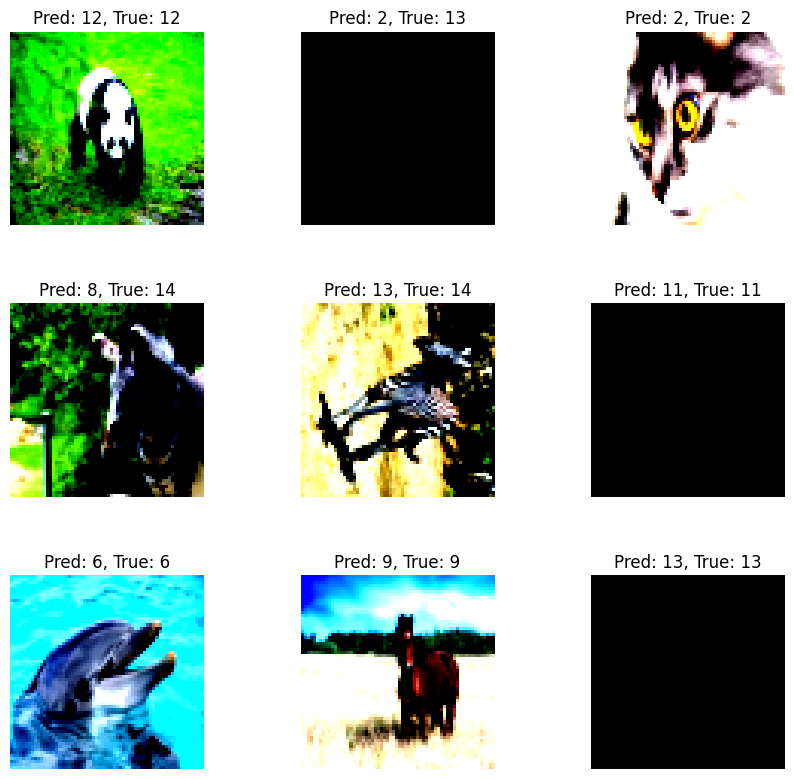

In [12]:


def plot_sample_predictions(model, test_loader):
    model.eval() 
    images, labels = next(iter(test_loader)) 
    outputs = model(images.cuda())  

    _, predicted = torch.max(outputs, 1) 
    
    predicted = predicted.cpu().numpy()
    labels = labels.numpy()

    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()

    for i in np.arange(9):
        axes[i].imshow(images[i].cpu().permute(1, 2, 0))  
        axes[i].set_title(f'Pred: {predicted[i]}, True: {labels[i]}')
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)
    plt.show()

plot_sample_predictions(model, test_loader)


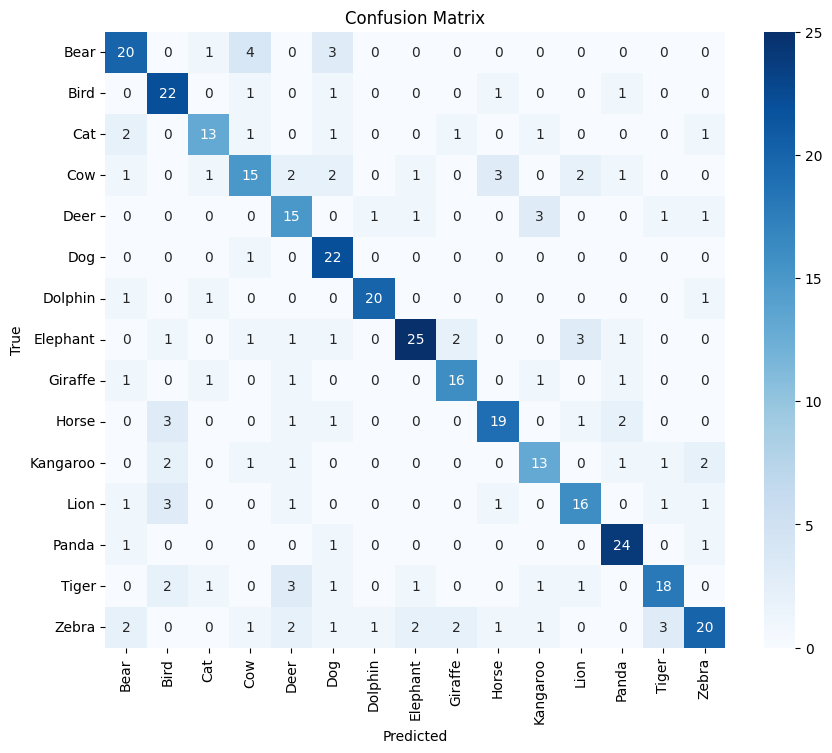

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, test_loader, dataset, num_classes=15):
    model.eval() 
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.cuda(), labels.cuda()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.append(labels.cpu())
            all_preds.append(predicted.cpu())

    all_labels = torch.cat(all_labels)
    all_preds = torch.cat(all_preds)

    cm = confusion_matrix(all_labels, all_preds, labels=np.arange(num_classes))

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(model, test_loader, dataset)


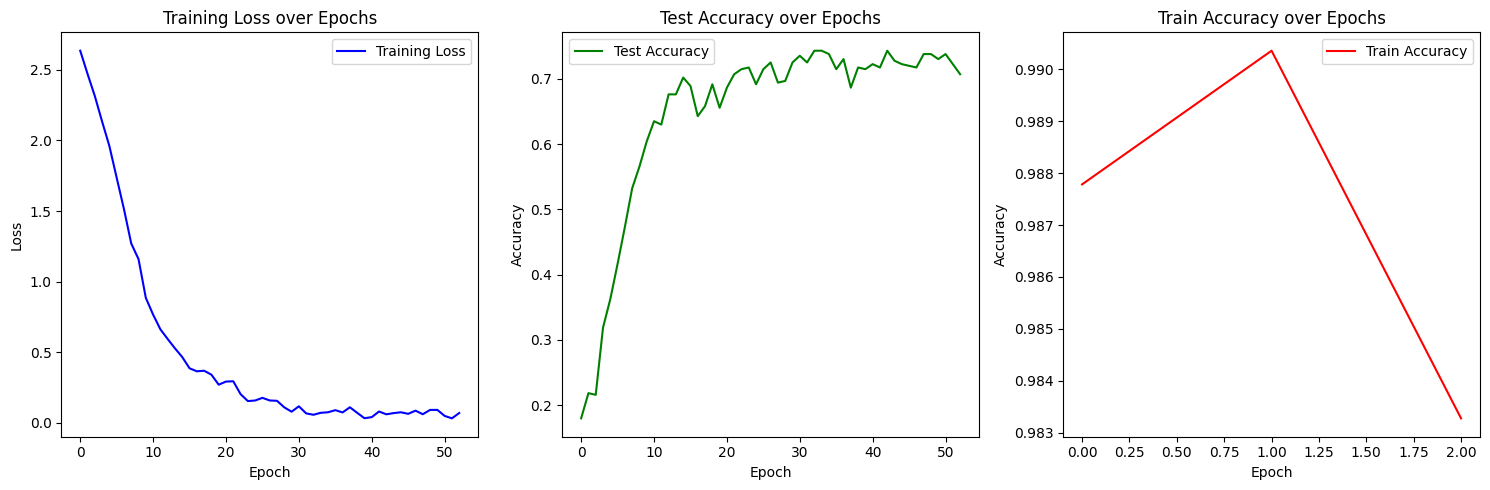

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(train_accuracies, label='Train Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()
